# Prepare Python Script to Load and Merge

In [4]:
# notebooks/01_eda.ipynb

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load merged dataset
df = pd.read_csv('../data/processed/merged_cleaned_data.csv', parse_dates=['DATE_TIME'])

# 3. Preview
print("Shape:", df.shape)
df.head()


Shape: (45680, 12)


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


**Data Types & Missing Values**

In [5]:
# Data types
df.dtypes

# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])


Missing values:
 Series([], dtype: int64)


**Time Range & Granularity**

In [6]:
print("Date range:", df['DATE_TIME'].min(), "to", df['DATE_TIME'].max())
print("Frequency (min):", df['DATE_TIME'].diff().min())


Date range: 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Frequency (min): 0 days 00:00:00


**Time-Series Trends

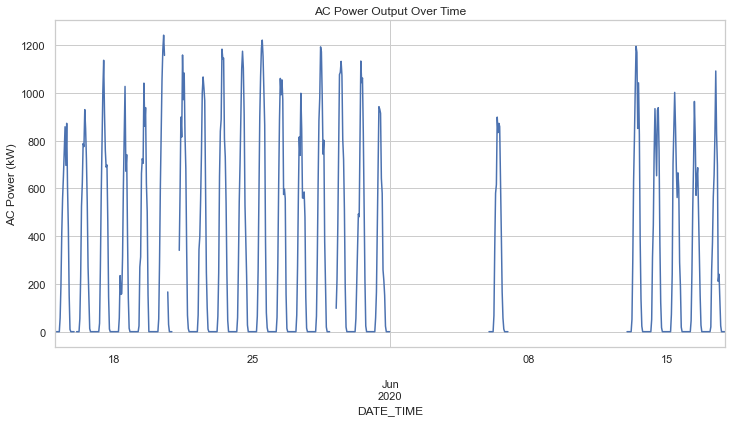

In [7]:
# Set datetime index
df = df.set_index('DATE_TIME')

# Resample to hourly average 
hourly_df = df.resample('H').mean()

# Plot AC Power over time
hourly_df['AC_POWER'].plot(title="AC Power Output Over Time")
plt.ylabel("AC Power (kW)")
plt.show()


Weather vs Power Correlations

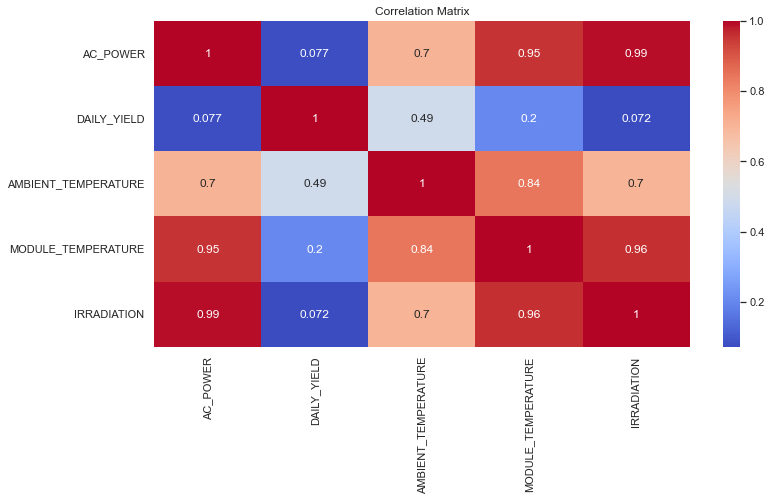

In [8]:
# Correlation heatmap
corr_cols = ['AC_POWER', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Scatterplots

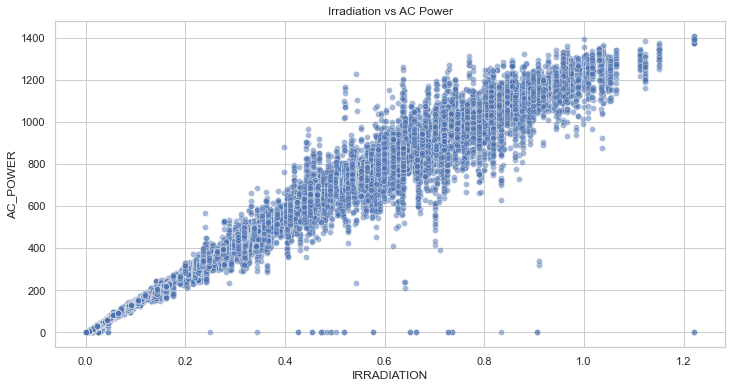

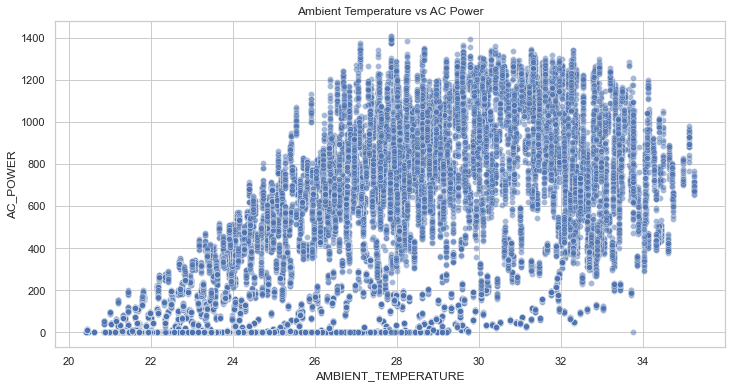

In [9]:
sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=df, alpha=0.5)
plt.title("Irradiation vs AC Power")
plt.show()

sns.scatterplot(x='AMBIENT_TEMPERATURE', y='AC_POWER', data=df, alpha=0.5)
plt.title("Ambient Temperature vs AC Power")
plt.show()


Daily Pattern

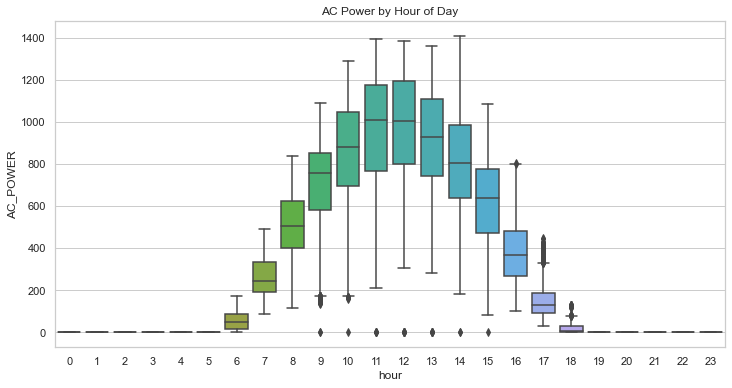

In [10]:
# Add hour of day column
df['hour'] = df.index.hour
sns.boxplot(x='hour', y='AC_POWER', data=df)
plt.title("AC Power by Hour of Day")
plt.show()


Save EDA Outputs

In [11]:
df.describe().to_csv('../reports/eda_summary.csv')
